# Credit Card Default Prediction - Data Exploration

### Introduction

Over a hundred macroeconomic datasets were pulled for this project, and they were engineered into a total of over 10,000 features. For that reason, only a handful of them will are explored in-depth. There are two main questions of interest in this data exploration:

<ol>
    <li><b>How well des the variable correlate with the outcome variable?</b> Macroeconomic variables that do not follow the same trend as the aggregate credit card default rate will not do well to predict it.</li>
    <li><b>Does the variable track lead the outcome variable?</b> The variable needs to be a <i>leading predictor</i> of credit card defaults, as the goal is to predict future default rates.</li>
</ol>

To evaluate these items, a number of visualizations and analyses are performed for each series:
<ol>
    <li>The series is isolated and graphed as a time series against the actual credit card default rate. This shows both whether the series are correlated and whether the series lags, leads, or overlaps the default rate.</li>
    <li>A scatter plot is created from the independent and dependent variables. This provides a visualization of how closely they are related, not just as a time series, but as independent samples.</li>
    <li> A linear regression on the two variables to evaluate the statistical significance of their relationship, to provide a more rigorous evaluation of the relationships explored graphically.</li>
</ol>

### Setting Up

The first steps are to set up the notebook. The required libraries are imported and the data that was created and wrangled in the macro_capstone_data_wrangling notebook is imported.

Additionally, a bootstrap_linreg function is declared that is used to evaluate the significance of the selected relationships to the dependent variable

In [2]:
import numpy as np
import pandas as pd
import fredapi
import datetime as dt
import calendar
import os
import matplotlib.pyplot as plt

In [42]:
ind_df = pd.read_pickle(r'data\ind_df.pkl')
dep_df = pd.read_pickle(r'data\dep_df.pkl')
dep_df_raw = pd.read_pickle(r'data\dep_df_raw.pkl')
dep_series = dep_df.iloc[:, 0]
dep_name = 'Credit Card Default Rate'

In [4]:
# Declare bootstrap function
def bootstrap_linreg(x, y, size=10000):
    """Takes in an array of x and an array of y, which are paired data, and a size as parameters. Performs linear regressions
    on the paried data and returns an array of slopes and an array of intercepts with length equal to the size parameter"""
    
    # Convert x and y to numpy arrays for use below
    x = np.asarray(x)
    y = np.asarray(y)
    
    # Set up the index array, as well as an array for the slope and interept replicates
    ind = np.arange(len(x))
    slope_reps = np.empty(size)
    intercept_reps = np.empty(size)

    # Generate replicates by running a linear regression on each generated set of pairs.
    for i in range(size):
        test_ind = np.random.choice(ind, size=len(ind))
        test_x, test_y = x[test_ind], y[test_ind]
        slope_reps[i], intercept_reps[i] = np.polyfit(test_x, test_y, 1)

    return slope_reps, intercept_reps


## Exploring the Data



### Data Exploration - M2 Money Supply



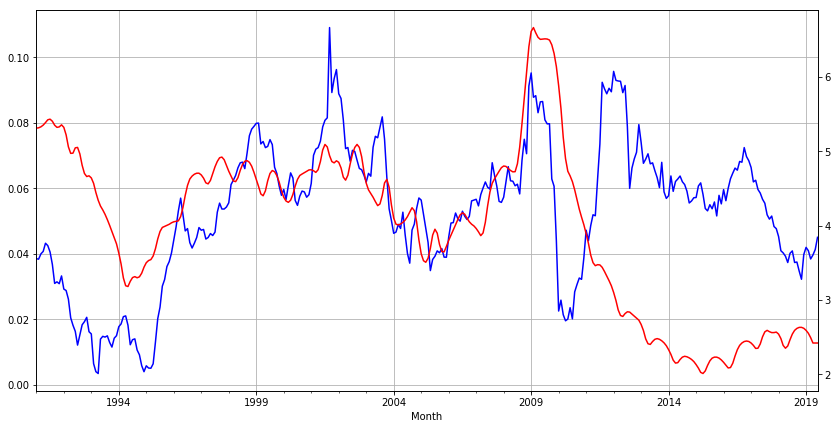

In [8]:
ind_series = ind_df.loc[:, 'M2_52wk_per_ch_max']

plt.figure(figsize=(14,7))
plt.xlabel('Period')

ax1 = ind_series.plot(color='blue', grid=True, label='M2 Y-o-Y Change')
ax2 = dep_series.plot(color='red', grid=True, secondary_y=True, label='Credit Card Defaults')

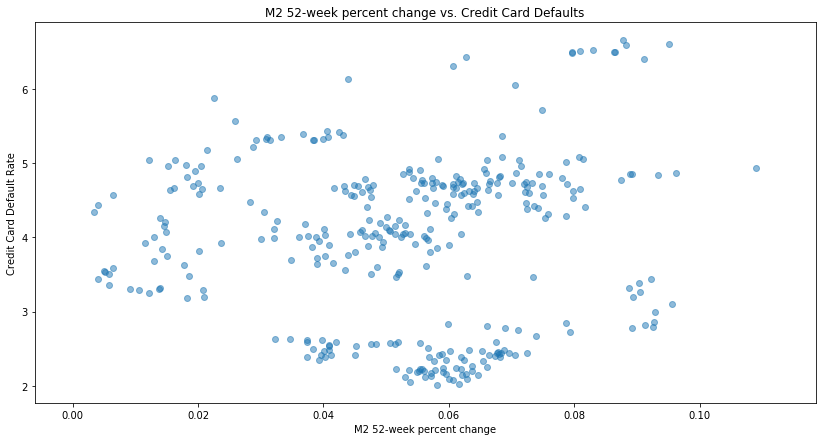

In [6]:
plt.figure(figsize=(14,7))

_ = plt.scatter(ind_series, dep_series, alpha=.5)
_ = plt.title('M2 52-week percent change vs. Credit Card Defaults')
_ = plt.xlabel('M2 52-week percent change')
_ = plt.ylabel('Credit Card Default Rate')

In [7]:
slope, intercept = bootstrap_linreg(ind_series, dep_series)
percentile_range = np.percentile(slope, [2.5, 97.5])
print(percentile_range)

[-2.92103968  7.78042169]


### Data Exploration - Consumer Sentiment

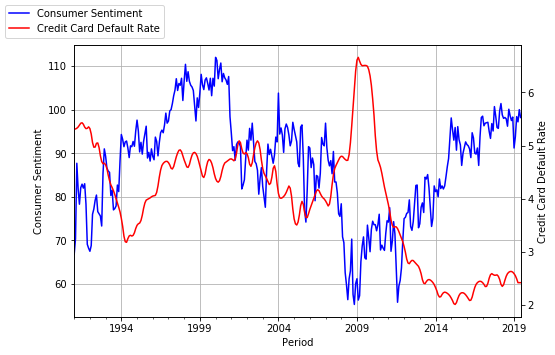

In [43]:
ind_series = ind_df.loc[:, 'UMCSENT_value']
ind_name = 'Consumer Sentiment'

fig = plt.figure(figsize=(8,5))
plt.xlabel('Period')

ax1 = ind_series.plot(color='blue', grid=True, label=ind_name)
ax1.set_ylabel(ind_name)
ax2 = dep_series.plot(color='red', grid=True, secondary_y=True, label=dep_name)
ax2.set_ylabel(dep_name)
_ = fig.legend(loc='upper left')


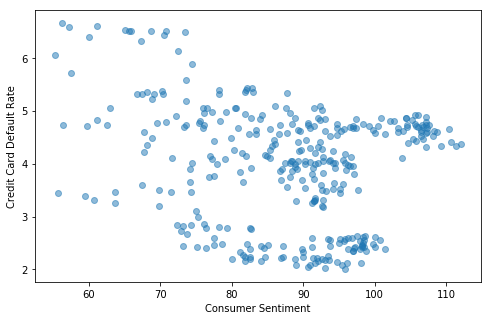

In [48]:
plt.figure(figsize=(8,5))

_ = plt.scatter(ind_series, dep_series, alpha=.5)
_ = plt.xlabel(ind_name)
_ = plt.ylabel(dep_name)

In [10]:
slope, intercept = bootstrap_linreg(ind_series, dep_series)
percentile_range = np.percentile(slope, [2.5, 97.5])
print(percentile_range)

[-0.03017697 -0.00936342]


### Data Exploration - Recession Probability

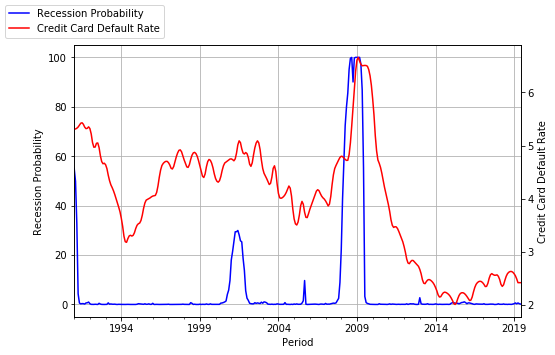

In [49]:
ind_series = ind_df.loc[:, 'RECPROUSM156N_value']
ind_name = 'Recession Probability'

fig = plt.figure(figsize=(8,5))
plt.xlabel('Period')

ax1 = ind_series.plot(color='blue', grid=True, label=ind_name)
ax1.set_ylabel(ind_name)
ax2 = dep_series.plot(color='red', grid=True, secondary_y=True, label=dep_name)
ax2.set_ylabel(dep_name)
_ = fig.legend(loc='upper left')


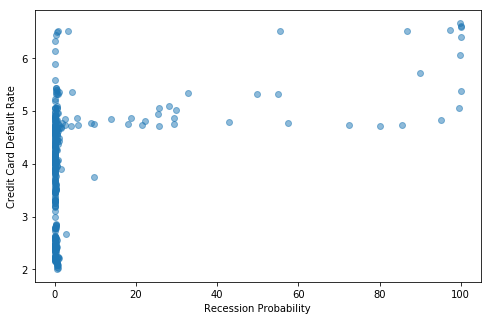

In [52]:
plt.figure(figsize=(8,5))

_ = plt.scatter(ind_series, dep_series, alpha=.5)
_ = plt.xlabel(ind_name)
_ = plt.ylabel(dep_name)

In [13]:
slope, intercept = bootstrap_linreg(ind_series, dep_series)
percentile_range = np.percentile(slope, [2.5, 97.5])
print(percentile_range)

[0.01930399 0.02745675]


### Data Exploration - 

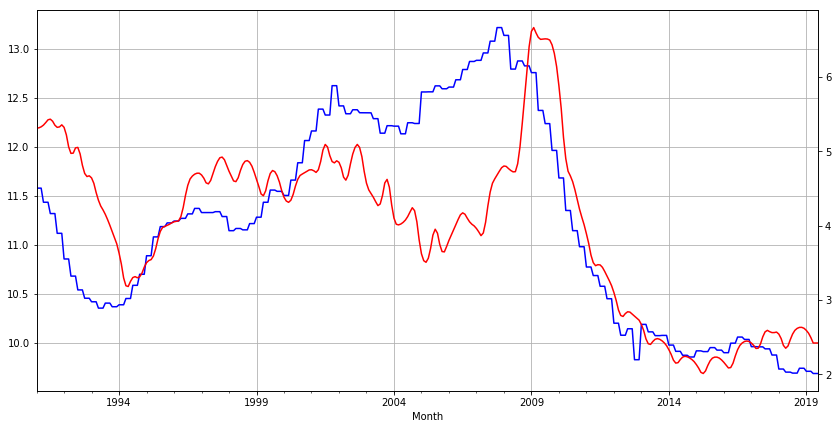

In [11]:
ind_series = ind_df.loc[:, 'TDSP_value']

plt.figure(figsize=(14,7))
plt.xlabel('Period')

ax1 = ind_series.plot(color='blue', grid=True, label='M2 Y-o-Y Change')
ax2 = dep_series.plot(color='red', grid=True, secondary_y=True, label='Credit Card Defaults')

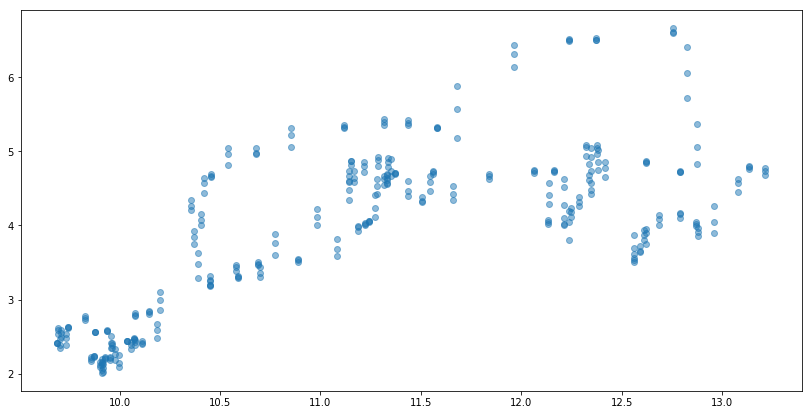

In [15]:
plt.figure(figsize=(14,7))

_ = plt.scatter(ind_series, dep_series, alpha=.5)

In [16]:
slope, intercept = bootstrap_linreg(ind_series, dep_series)
percentile_range = np.percentile(slope, [2.5, 97.5])
print(percentile_range)

[0.67772384 0.83866037]


### Data Exploration - 

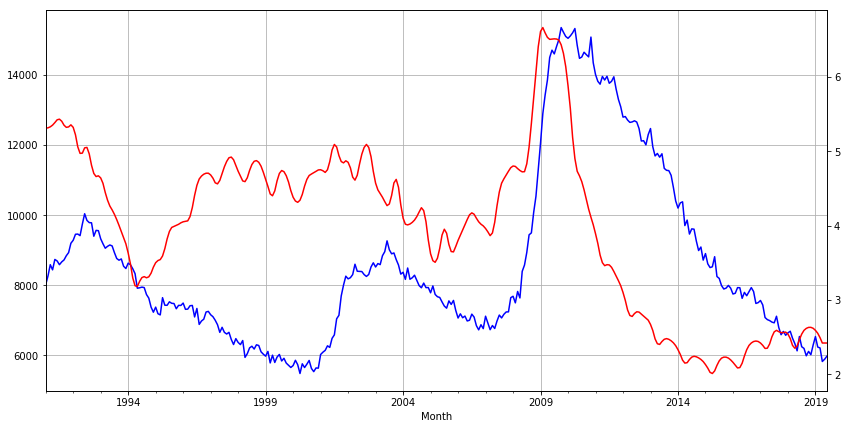

In [12]:
ind_series = ind_df.loc[:, 'UNEMPLOY_value']

plt.figure(figsize=(14,7))
plt.xlabel('Period')

ax1 = ind_series.plot(color='blue', grid=True, label='M2 Y-o-Y Change')
ax2 = dep_series.plot(color='red', grid=True, secondary_y=True, label='Credit Card Defaults')

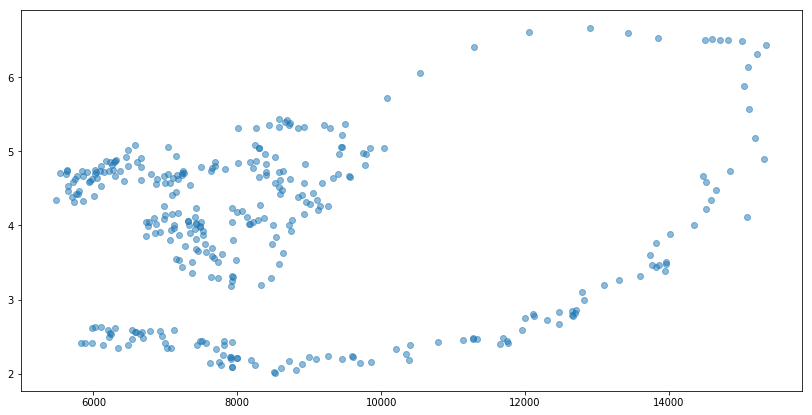

In [18]:
plt.figure(figsize=(14,7))

_ = plt.scatter(ind_series, dep_series, alpha=.5)

In [19]:
slope, intercept = bootstrap_linreg(ind_series, dep_series)
percentile_range = np.percentile(slope, [2.5, 97.5])
print(percentile_range)

[-5.75717388e-06  1.04456918e-04]
